In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
df = pd.read_csv('top50.csv', encoding = "latin1")
df.head(3)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85


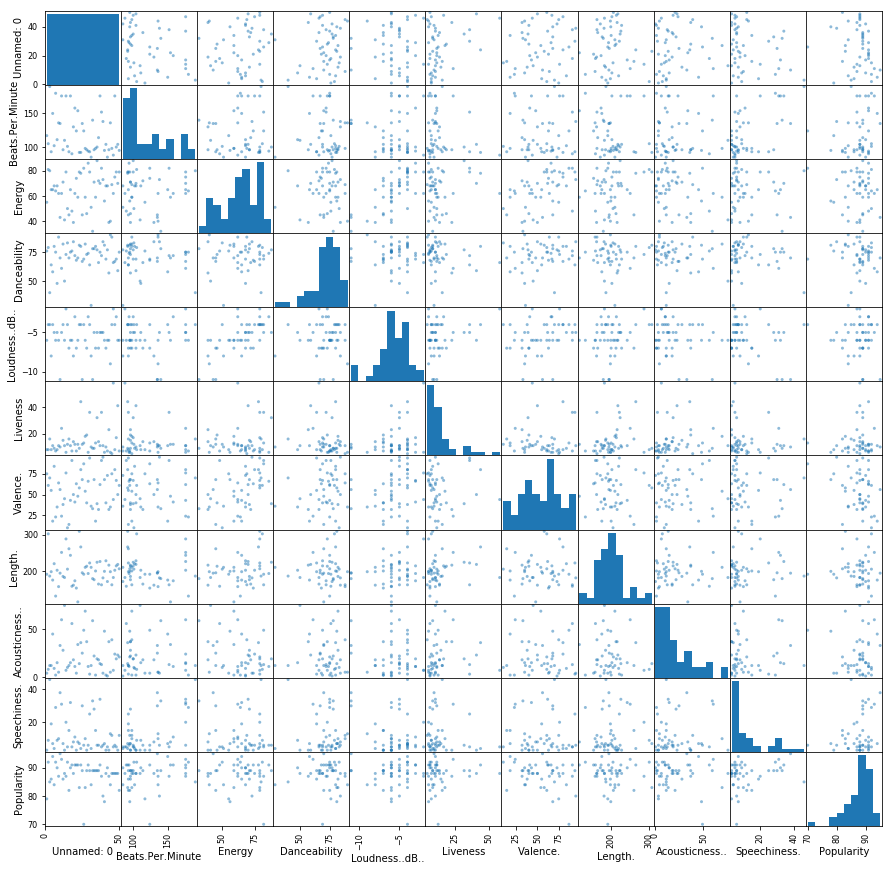

In [87]:
pd.plotting.scatter_matrix(df, figsize = (15,15))
plt.show()

In [88]:
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

In [89]:
df['Classes'] = pd.cut(df['Popularity'], [69, 75, 80, 85, 90, 95], labels=['5', '4', '3', '2', '1'])
df.drop('Popularity', axis = 1, inplace = True)

In [90]:
df.drop(df.columns[0:2], axis=1, inplace=True)
df.head(3)

,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Classes
0,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,4
1,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,1
2,Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,3


In [91]:
normalize_numeric_minmax(df, 'Beats.Per.Minute')
normalize_numeric_minmax(df, 'Energy')
normalize_numeric_minmax(df, 'Danceability')
normalize_numeric_minmax(df, 'Loudness..dB..')
normalize_numeric_minmax(df, 'Liveness')
normalize_numeric_minmax(df, 'Valence.')
normalize_numeric_minmax(df, 'Length.')
normalize_numeric_minmax(df, 'Acousticness..')
normalize_numeric_minmax(df, 'Speechiness.')

In [92]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [93]:
encode_text_dummy(df, 'Artist.Name')
encode_text_dummy(df, 'Genre')

In [95]:
df.head(3)

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Classes,...,Genre-electropop,Genre-escape room,Genre-latin,Genre-panamanian pop,Genre-pop,Genre-pop house,Genre-r&b en espanol,Genre-reggaeton,Genre-reggaeton flow,Genre-trap music
0,0.304762,0.410714,0.770492,0.555556,0.056604,0.764706,0.391753,0.040541,0.000000,4,...,0,0,0,0,0,0,0,0,0,0
1,0.190476,0.875000,0.819672,0.777778,0.056604,0.600000,0.963918,0.094595,0.139535,1,...,0,0,0,0,0,0,0,0,1,0
2,1.000000,0.857143,0.180328,0.777778,0.207547,0.705882,0.365979,0.148649,1.000000,3,...,0,0,0,0,0,0,0,0,0,0


In [96]:
from sklearn.model_selection import train_test_split
x = df.drop('Classes', axis=1)
y = df[['Classes']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [99]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(x, y)

In [100]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)

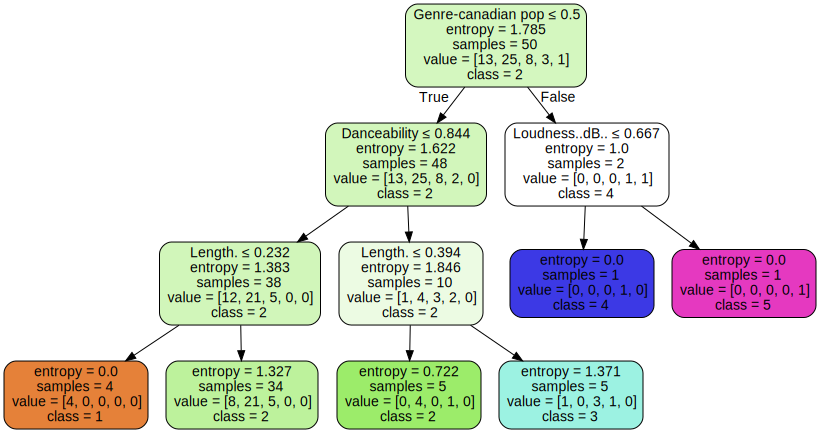

In [103]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=x.columns,  
                      class_names=['1', '2', '3', '4', '5'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph